# ARIMA -  AutoRegressive Integrated Moving Average 

ARIMA stands for AutoRegressive Integrated Moving Average - it's a statistical model specifically designed for time series forecasting, which makes it particularly relevant for stock market prediction.

Let me break down what each component does:

AR (AutoRegressive): This part uses past values to predict future values. For example, today's stock price might be influenced by yesterday's price, the day before, etc. If a stock has been trending upward for 5 days, the AR component captures that momentum.

I (Integrated): This makes the data "stationary" by differencing - essentially removing trends. Stock prices constantly move up and down over time, but ARIMA works better when it looks at the changes in price rather than the raw prices themselves.
MA (Moving Average): This uses past prediction errors to improve future predictions. If the model overestimated yesterday's price, it adjusts today's prediction accordingly.
For stock prediction specifically:
ARIMA works well when stock prices show clear patterns like trends or seasonality. For example, if a stock tends to rise at the beginning of each month, ARIMA might catch that pattern.
However, ARIMA has important limitations for stocks:

It assumes past patterns will continue (which markets often don't)
It doesn't incorporate external factors (news, economic reports, company earnings)
It struggles with sudden market shocks or volatility

ARIMA is actually a great next step after linear regression in your learning journey - it's more sophisticated because it accounts for time-based dependencies, but it's still relatively simple to understand and implement in Python using libraries like statsmodels.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
data = pd.read_csv("market.csv.gz", parse_dates=['Date'],compression='gzip')
data.head(10)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1,1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
2,1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
3,1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
4,1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
5,1928-01-09 00:00:00-05:00,17.500000,17.500000,17.500000,17.500000,0,0.0,0.0
6,1928-01-10 00:00:00-05:00,17.370001,17.370001,17.370001,17.370001,0,0.0,0.0
7,1928-01-11 00:00:00-05:00,17.350000,17.350000,17.350000,17.350000,0,0.0,0.0
8,1928-01-12 00:00:00-05:00,17.469999,17.469999,17.469999,17.469999,0,0.0,0.0
9,1928-01-13 00:00:00-05:00,17.580000,17.580000,17.580000,17.580000,0,0.0,0.0


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

def getARIMA(prices, train_size_calc, p, d, q):
    # Split data
    train_size = int(len(prices) * train_size_calc)
    train = list(prices[:train_size])
    test = prices[train_size:]
    
    history = [x for x in train]
    predictions = []

    # Walk-forward validation: Predict one step at a time
    print(f"Starting rolling forecast for order ({p},{d},{q})...")
    for t in range(len(test)):
        model = ARIMA(history, order=(p, d, q))
        model_fit = model.fit()
        
        # Forecast the next single step
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        
        # Add the ACTUAL observation to history for the next prediction
        obs = test.iloc[t]
        history.append(obs)

    # Convert predictions to a Series with the correct index for plotting
    predictions_series = pd.Series(predictions, index=test.index)

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(prices[:train_size].index, prices[:train_size], label='Training Data', color='blue')
    plt.plot(test.index, test, label='Actual Prices', color='green')
    plt.plot(test.index, predictions_series, label='ARIMA Rolling Prediction', color='red', linestyle='--')
    plt.title(f'SPX Price Prediction - ARIMA({p},{d},{q})')
    plt.legend()
    plt.show()

    mae = np.mean(np.abs(test - predictions_series))
    print(f"Mean Absolute Error: ${mae:.2f}")

# Usage
# Note: I corrected the function call to use your passed p, d, q variables
# prices = data['Close'].tail(600)
# getARIMA(prices, 0.8, 5, 1, 0)

Starting rolling forecast for order (1,1,1)...


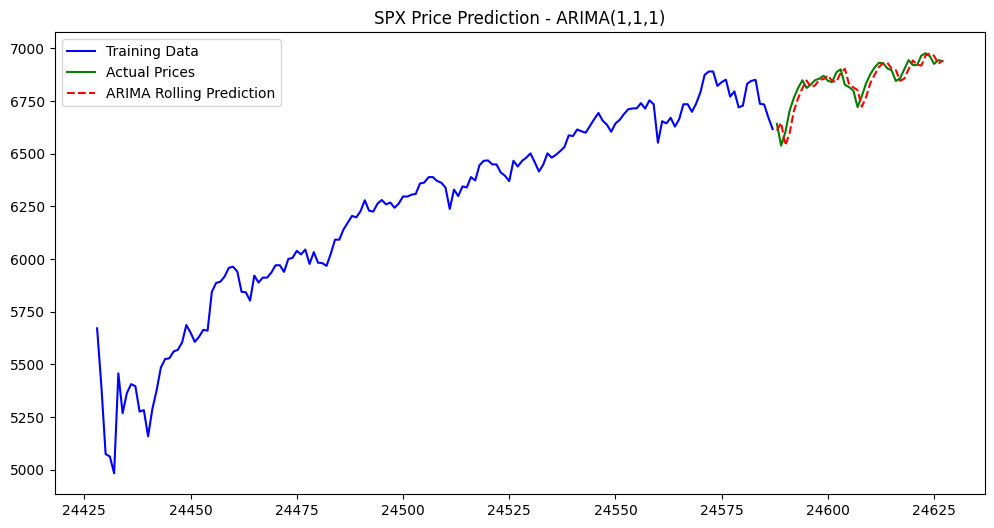

Mean Absolute Error: $34.70


In [6]:
prices = data['Close'].tail(600)
getARIMA(prices,0.8,1,1,1)


Starting rolling forecast for order (5,1,2)...


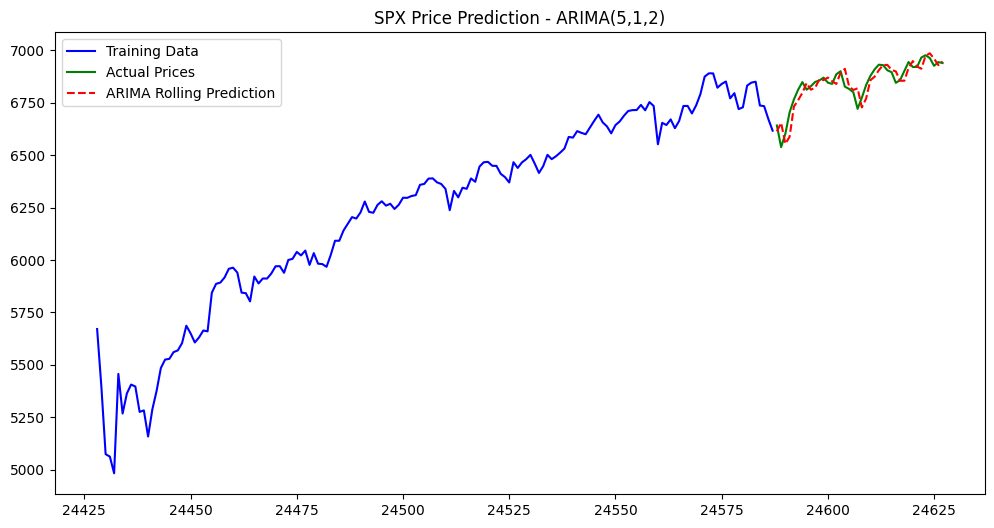

Mean Absolute Error: $34.04


In [7]:
getARIMA(prices,0.8,5,1,2)

Starting rolling forecast for order (3,1,1)...


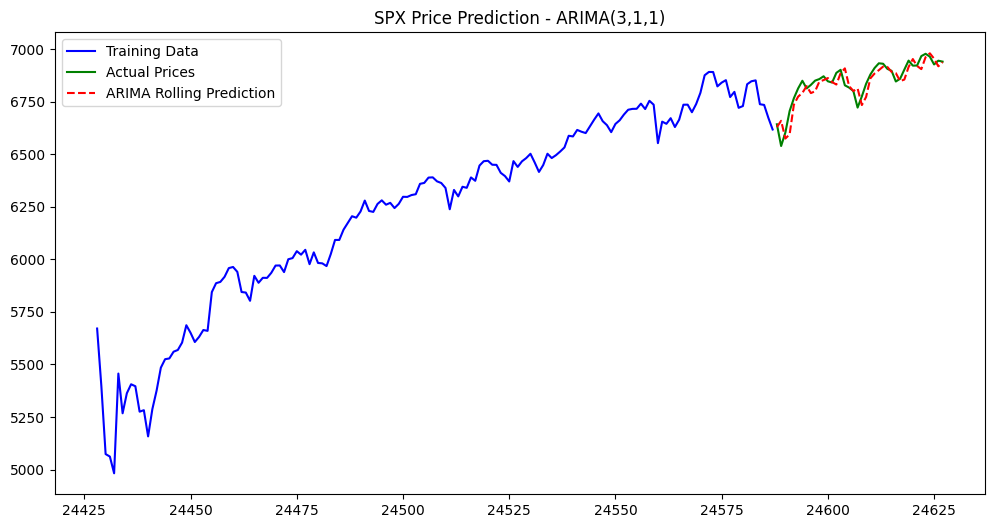

Mean Absolute Error: $32.99


In [8]:
getARIMA(prices,0.8,3,1,1)

Starting rolling forecast for order (3,1,1)...


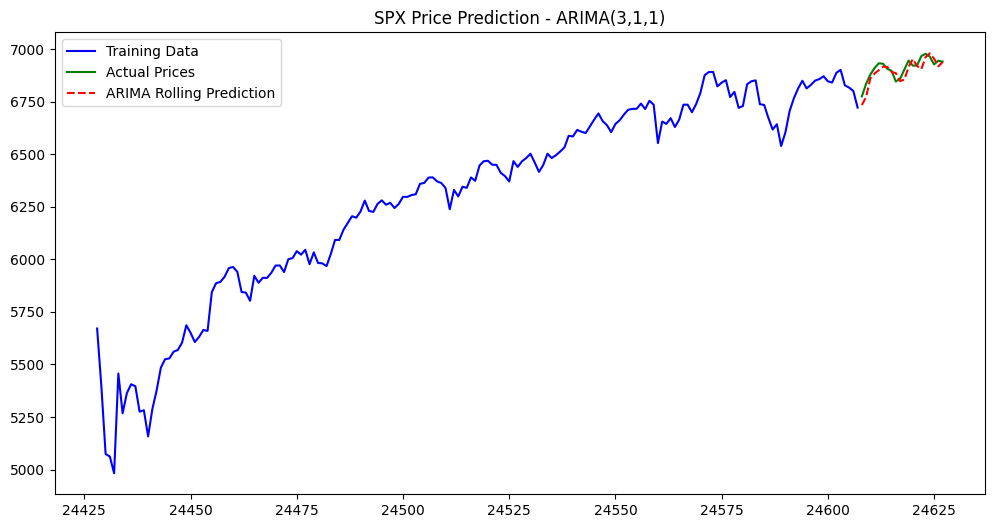

Mean Absolute Error: $26.06


In [10]:
getARIMA(prices,0.90,3,1,1)

In [11]:
from statsmodels.tsa.stattools import adfuller

# Test if data is stationary (helps determine 'd')
result = adfuller(prices)
print(f"Is data stationary? p-value: {result[1]:.4f}")

Is data stationary? p-value: 0.7065
